<a href="https://colab.research.google.com/github/MT2321/Notebooks-Comunicaciones-Digitales/blob/master/Ejercicio_de_Transmisi%C3%B3n_en_Banda_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comunicaciones digitales

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Ejercicio 1
##Señales ortogonales


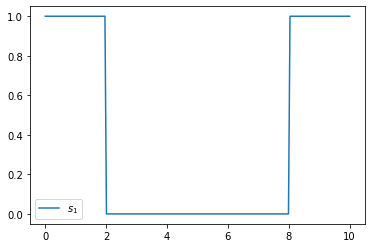

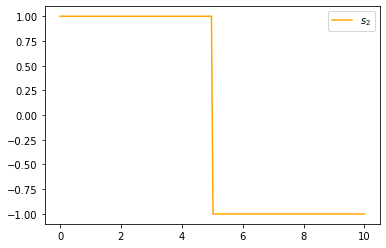

In [23]:
samples_per_block = 20

s1 = np.concatenate( (np.full(2*samples_per_block,1), np.full(6*samples_per_block,0), np.full(2*samples_per_block,1)))
plt.plot(np.linspace(0,10,num=len(s1)),s1,label="$s_1$")
plt.legend()
plt.show()

s2 = np.concatenate( (np.full(5*samples_per_block,1), np.full(5*samples_per_block,-1)) )
plt.plot(np.linspace(0,10,num=len(s2)),s2,label="$s_2$",color="orange")
plt.legend()
plt.show()

## Tipo de señal

In [3]:
 print(f"El coeficiente de correlación es {round(np.corrcoef(s1,s2)[0][1])} por lo tanto son ortogonales")

El coeficiente de correlaicón es 0.0 por lo tanto son ortogonales


# Taps del filtro FIR


$$
\begin{array}{|l|cccccccccc|}
\hline
   t       & 1 & 2 & 3  & 4  & 5  & 6  & 7  & 8  & 9  & 10 \\ \hline
s_1      & 1 & 1 & -1 & -1 & -1 & -1 & -1 & -1 & 1  & 1  \\
s_2      & 1 & 1 & 1  & 1  & 1  & -1 & -1 & -1 & -1 & -1 \\
s_1-s_2 & 0 & 0 & -2 & -2 & -2 & 0  & 0  & 0  & 2  & 2  \\ \hline
\end{array}
$$

La regla de decisión es 

## $$ z(T)\underset{s_2}{\overset{s_1}{\gtrless}} 0$$



##Decodificando

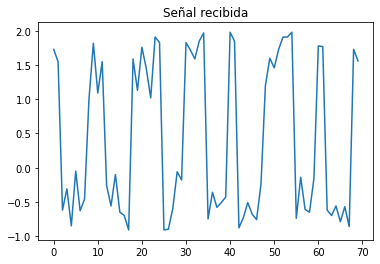

In [10]:
signal_in = [1.73, 1.55, -0.62, -0.31, -0.85, -0.05, -0.63, -0.46, 1.00, 1.82, 1.09, 1.55, -0.26, -0.56, -0.10,
-0.65, -0.70, -0.91, 1.59, 1.13, 1.76, 1.45, 1.02, 1.91, 1.83, -0.91, -0.90, -0.60, -0.06, -0.18, 1.83,
1.72, 1.59, 1.85, 1.97, -0.75, -0.36, -0.58, -0.51, -0.43, 1.98, 1.85, -0.88, -0.73, -0.51, -0.68,
-0.76, -0.24, 1.20, 1.60, 1.46, 1.73, 1.91, 1.91, 1.98, -0.74, -0.14, -0.61, -0.65, -0.16, 1.78, 1.77,
-0.62, -0.70, -0.56, -0.79, -0.57, -0.86, 1.73, 1.56]
plt.title("Señal recibida")
plt.plot(signal_in)

In [12]:
#Tomamos de a 10 muestras de la señal de entrada y las pasamos por el correlador de la señal diferencia
dff_correlator = [0,0,-2,-2,-2,0,0,0,2,2] ##Coefiecientes del Filtro FIR de la señal diferencias s1-s2
bits_sent=[]
sample_length=10

#Vamos de a 10 muestras a la vez
for i in range(len(signal_in)//sample_length):
  #Tomamos la muestra
  sample = signal_in[i*10:(i+1)*10]
  #Realizamos la multiplicación
  sample_x_diff_correlator = np.multiply(dff_correlator,sample)
  #Sumamos todo y guardamos
  bits_sent.append(np.sum(sample_x_diff_correlator))

print("Utilizando señales ortogonales")
print(f"A la salida del correlador {bits_sent}")
#Realizamos la detección los 0's y 1's aplicando la regla de decisión
bits_sent = list(map(lambda x: int((np.sign(x)+1)/2), bits_sent))
print(f"La secuencia enviada es {bits_sent}")

Utilizando señales ortogonales
A la salida del correlador [9.2, 7.28, -9.999999999999998, -12.7, 9.84, -13.22, 10.34]
La secuencia enviada es [1, 1, 0, 0, 1, 0, 1]


#Ejercicio 2
##Señales Antipodales
En este caso tenemos un par de señales **antipodales** dado que una es la opuesta de la otra, es decir:
##$$
s_2(t) = -s_1(t)
$$

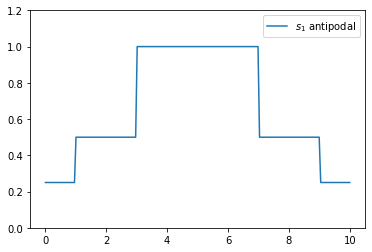

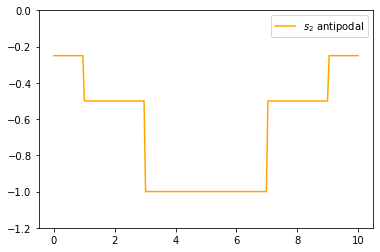

In [37]:
samples_per_block = 20
s1_antipodal = np.concatenate( (np.full(1*samples_per_block,0.25), 
                                np.full(2*samples_per_block,0.5),
                                np.full(4*samples_per_block,1),
                                np.full(2*samples_per_block,0.5),
                                np.full(1*samples_per_block,0.25)))
plt.plot(np.linspace(0,10,num=len(s1_antipodal)),s1_antipodal,label="$s_1$ antipodal")
plt.legend()
plt.ylim(0,1.2)
plt.show()

s2_antipodal = -s1_antipodal
plt.plot(np.linspace(0,10,num=len(s2_antipodal)),s2_antipodal,label="$s_2$ antipodal",color="orange")
plt.ylim(-1.2,0)
plt.legend()
plt.show()

$$
\begin{array}{|l|cccccccccc|}
\hline
  t         & 1     & 2    & 3    & 4  & 5  & 6  & 7  & 8    & 9    & 10    \\ \hline
s_1      & 0.25  & 0.5  & 0.5  & 1  & 1  & 1  & 1  & 0.5  & 0.5  & 0.25  \\
s_2      & -0.25 & -0.5 & -0.5 & -1 & -1 & -1 & -1 & -0.5 & -0.5 & -0.25 \\
s_1-s_2 & 0.5   & 1    & 1    & 2  & 2  & 2  & 2  & 1    & 1    & 0.5   \\ \hline
\end{array}
$$

La regla de decisión es 

## $$ z(T)\underset{s_2}{\overset{s_1}{\gtrless}} 0$$



70


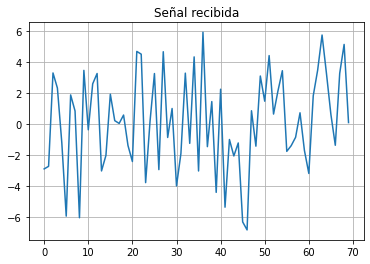

In [39]:
signal_in2 = [-2.886236269, -2.721487267, 3.297717394, 2.325378948, -1.204014219, -5.93039373, 1.882076516, 0.8461207766, -6.033064972, 3.463983586, -0.3661573801, 2.596654858, 3.262765025, -3.016945575, -2.018103601, 1.92795173, 0.2230980747, 0.04473824092, 0.5850795922, -1.377766564, -2.410204671, 4.685972073, 4.509242885, -3.771397977, 0.1778974922, 3.260364561, -2.932848784, 4.665979279, -0.8604256543, 1.007122411, -3.982682163, -1.897506129, 3.285385056, -1.239393004, 4.332644488, -3.019707858, 5.921924586, -1.45223687, 1.45298562, -4.39872189, 2.249509065, -5.354869391, -0.9921304129, -2.051669239, -1.214248891, -6.303600412, -6.819024537, 0.8613622341, -1.420745973, 3.100731679, 1.477829181, 4.416979486, 0.6486307128, 2.139395081, 3.442248537, -1.755560537, -1.38869891, -0.8483125642, 0.7303822176, -1.696412916, -3.179888828, 1.828083282, 3.479221081, 5.742216882, 3.255065287, 0.6283923851, -1.36340165, 3.273539071, 5.136268057, 0.09901859321]
plt.grid()
plt.title("Señal recibida")
plt.plot(signal_in2)

In [9]:
dff_correlator2 = [0.5, 1, 1, 2, 2, 2, 2, 1, 1, 0.5] #Coefiecientes del Filtro FIR de la señal diferencias s1-s2
sample_length2 = 10
bits_sent2 = []
#Vamos de a 10 muestras a la vez
for i in range(len(signal_in2)//sample_length2):
  #Tomamos la muestra
  sample2 = signal_in2[i*10:(i+1)*10]
  #Realizamos la multiplicación
  sample_x_diff_correlator2 = np.multiply(dff_correlator2,sample2)
  #Sumamos todo y guardamos
  bits_sent2.append(np.sum(sample_x_diff_correlator2))

print("Utilizando señales antipodales")
print(f"A la salida del correlador {bits_sent2}")
#Realizamos la detección los 0's y 1's aplicando la regla de decisión
bits_sent2 = list(map(lambda x: int((np.sign(x)+1)/2), bits_sent2))
print(f"La secuencia enviada es {bits_sent2}")

Utilizando señales antipodales
A la salida del correlador [-10.1757453799, -0.15072299852999926, 5.767258037100001, 9.1888620745, -37.0083493288, 9.713156326700002, 28.701222181804997]
La secuencia enviada es [0, 0, 1, 1, 0, 1, 1]
